# Credit Card Fraud Detection (Imbalanced dataset)

In [73]:
%pylab inline
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


<b>Read the data file

In [74]:
#Read the data file
cc = pd.read_csv("E:/SCU Business Analytics/Machine Learning/Assignment/DSTMAA_data/creditcard.csv")

In [75]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<b>Data Exploration

28 out of 31 columns are PCA generated. We do not have original features and more background information about the data (V1,V2,....V28).  

In [76]:
print('Total number of observations:',len(cc.index))

Total number of observations: 284807


Percentage of fradulent transactions in data.: 0.1727485630620034


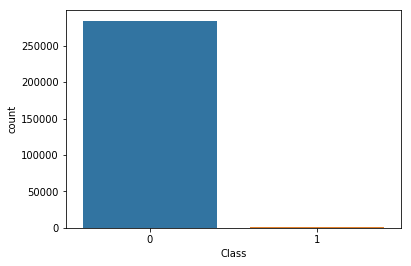

In [77]:
print('Percentage of fradulent transactions in data.:',cc.Class.mean()*100)
sns.countplot(cc.Class)

It is clear from the above  distribution that number of fradulent transactions are very low (only .17%) as compared to non-fradulent transaction (99.83%). Directly running any classifier will yield higher accuracy score as one of the class is highly represented in the data.

<b>Time - Data is collected for 2 days. During the day time, number of transactions are higher than night. Will drop this variable.

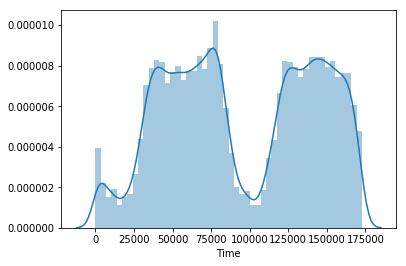

In [78]:
sns.distplot(cc.Time)

<b>Amount - There are very few transactions of higher values. Lower value transactions dominates the data.

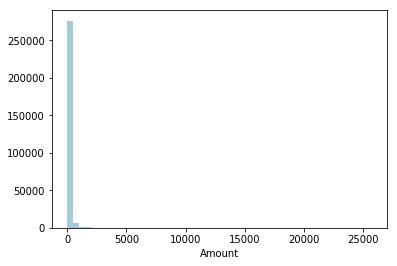

In [79]:
sns.distplot(cc.Amount,kde=False)

Normalizing the variables (Amount)

In [80]:
cc['amt_normalize'] = ((cc.Amount) - (cc.Amount.mean()))/(cc.Amount.std())

<b><font color = 'blue'>A. Directly Running logistic regression to classify fradulent and non-fradulent transactions. 
<br><b><p> <font color='red'>This approach is not correct. It's just to showcase what is wrong.

<b>A-1. Creating training and test data  

In [81]:
cc1 = cc.copy()
y = cc.Class
X = cc.drop(columns =['Class','Amount','Time']) #dropping time too
#  Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [82]:
#saving original data of X and y. This will be used when trying out diffrent methods.
X_org = X
y_org = y

<b>A-2. Fit logistic regression classifier to train data.

In [83]:
# instantiate a logistic regression model, and fit with X_train and y_train
model = LogisticRegression()
model = model.fit(X_train, y_train)

<b>A-3. Accuracy, Confusion Matrix & is there Overfitting?

In [84]:
# check the accuracy on the training set
print("accuracy on the training set:",model.score(X_train, y_train))

# check the accuracy on the test dataset
print("accuracy on the testing set:",model.score(X_test, y_test))

accuracy on the training set: 0.9992191594172518
accuracy on the testing set: 0.9991594582229457


In [85]:
# Predict class labels for the train set
predicted = model.predict(X_train)
# Confusion Matrix for train data
print('Confusion Matrix on train data')
print(confusion_matrix(predicted, y_train))

# Predict class labels for the test dataset
predicted_test = model.predict(X_test)
# Confusion Matrix for test data
print('Confusion Matrix on test data')
print(confusion_matrix(predicted_test, y_test))

Confusion Matrix on train data
[[190463    122]
 [    27    208]]
Confusion Matrix on test data
[[93811    65]
 [   14    97]]


There is <b>no overfitting</b> because the model is predicting the 'test' dataset almost similar to train dataset.
<br><br>
Since,our dataset is highly imbalanced, the accuracy is only reflecting the underlying class distribution which in this case is majority non-fradulent cases. Therefore, we need to compute other metrices like precision, recall and F1 score using confusion matrix to detect overfitting.

<b>A-4. Precision, Recall, F1-Scores and AUC.

In [86]:
print(classification_report(predicted_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93876
           1       0.60      0.87      0.71       111

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.80      0.94      0.86     93987
weighted avg       1.00      1.00      1.00     93987



We observed that our model is predicting non-fraulent transactions very well. However, they are <b> not predicting fradulent transactions</b> that well. For fradulent transactions, precision is 60%, recall is 87% and F1-score of 71% only.

<b>So, which metric is most important?</b>
<ul><li>Precision is an important metric - We want our model to be precise. If our model is not predicting correctly then banks would block the genuine transactions which lead to customer dissatisfaction.
    <li>Recall is also an important metric - If recall is low than our model is not predicting fradulent transactions well. Bank will have to incur losses as these transactions are not getting detected correctly.
    <li>Therefore, we are looking at F1 score which is harmonic mean of precision and recall scores.

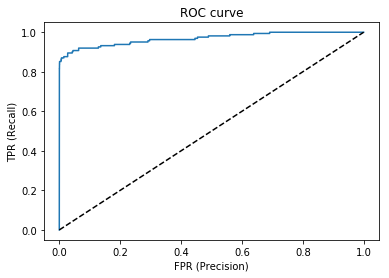

Area under curve (AUC):  0.96833762619534


In [87]:
#ROC, AUC
from sklearn.metrics import roc_curve, auc
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

<b>Though AUC is high, we are not satisfied with the our results as it is not capturing fraudulent transactions that well. Our model is predicting non-fradulent transaction better than fradulent transactions. We also know that this is happening because of highly imbalanced dataset. So what should we do?

<b>Following are few techniques I have tried to cater the issue of imbalanced dataset.
<ol><li> Cross-Validation
    <li> Oversample minority class (i.e. fradulent transactions)
    <li> Ensemble modelling (Random Forrest)
    <li> Bagging
    <li> Boosting (XGBoost, ADABoost)
    <li> Changing the Threshold

<b><font color = 'blue'>1. Cross-Validation

On Train data

In [88]:
scores = cross_val_score(model, X_train, y_train, cv=10)
y_pred = cross_val_predict(model, X_train, y_train, cv=10)
conf_mat = confusion_matrix(y_train, y_pred)
print('Confusion Matrix on train data')
print(conf_mat)
# Accuracy on train data:
print("accuracy on the training set:",scores.mean())

Confusion Matrix on train data
[[190463     27]
 [   126    204]]
accuracy on the training set: 0.9991981972539566


On Test data

In [89]:
scores_test = cross_val_score(model, X_test, y_test, cv=10)
y_pred_test = cross_val_predict(model, X_test, y_test, cv=10)
conf_mat_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix on test data')
print(conf_mat_test)

#Accuracy on Test Data:
print("accuracy on the training set:",scores_test.mean())

Confusion Matrix on test data
[[93808    17]
 [   67    95]]
accuracy on the training set: 0.9991062584641602


In [90]:
# cross validation- classification report on test data:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93875
           1       0.59      0.85      0.69       112

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.79      0.92      0.85     93987
weighted avg       1.00      1.00      1.00     93987



<b>There is not much improvement using cross-validation. For fradulent transactions, precision is 59%, recall is 85% and F1-score of 69% only.

<b><font color = 'blue'>2. Oversampling minority class (i.e. fradulent transactions)

In [121]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X= X_org
y= y_org
X_res, y_res = sm.fit_resample(X, y)

#  Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=0)

Fitting the model on train data.

In [122]:
# instantiate a logistic regression model, and fit with X_train and y_train
model = LogisticRegression()
model = model.fit(X_train, y_train)

On test data

accuracy on the testing set: 0.9464955661664393
[[91344  7691]
 [ 2349 86264]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     99035
           1       0.92      0.97      0.95     88613

   micro avg       0.95      0.95      0.95    187648
   macro avg       0.95      0.95      0.95    187648
weighted avg       0.95      0.95      0.95    187648



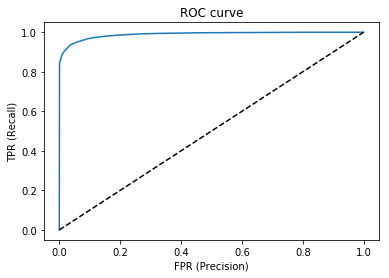

Area under curve (AUC):  0.9890538533977183


In [123]:
# check the accuracy on the test dataset
print("accuracy on the testing set:",model.score(X_test, y_test))

# Predict class labels for the test set
predicted = model.predict(X_test)

# Confusion Matrix for train data
print(confusion_matrix(predicted, y_test))

print(classification_report(predicted, y_test))

#ROC, AUC
from sklearn.metrics import roc_curve, auc
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

<b>AUC is high (98.9%). Along with it our F1-score, precison and recall scores are also high (95%, 92% and 97% respectively).

With this approach, we are able to correctly predict 92% of fradulent cases correctly. After oversampling the minority class, our detection rate improved significantly.

<b><font color = 'blue'> 3. Ensemble modelling (Random Forrest)</b>


In [124]:
#preparing original data
X= X_org
y= y_org

#  Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [125]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
model_rf = rf.fit(X_train, y_train)

AUC = 0.9287169112446668
Accuracy = 0.9994786513028397
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.93      0.75      0.83       162

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.97      0.88      0.92     93987
weighted avg       1.00      1.00      1.00     93987



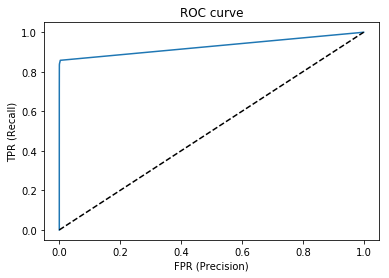

Area under curve (AUC):  0.9287169112446668


In [126]:
predicted_rf = model_rf.predict(X_test)
probs_rf = model_rf.predict_proba(X_test)
print('AUC =', roc_auc_score(y_test, probs_rf[:, 1]))
print('Accuracy =', accuracy_score(y_test, predicted_rf))
print(classification_report(y_test, predicted_rf))

#ROC, AUC
from sklearn.metrics import roc_curve, auc
y_score = model_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

<b>With Random forrest, our AUC has dropped to 92.2% from 96.8% and recall has also seen a dropped to 75% from 85%. However, precision has been increased from 60% to 94%. If we are only concerned about precision then ensemble method like Random forrest gives better results.

<b><font color = 'blue'>4. Bagging

In [107]:
#preparing original data
X= X_org
y= y_org

#  Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93879
           1       0.59      0.88      0.70       108

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.79      0.94      0.85     93987
weighted avg       1.00      1.00      1.00     93987

Accuracy = 0.9991488184536159


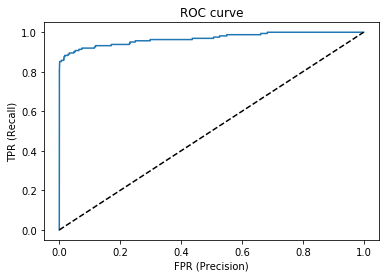

Area under curve (AUC):  0.9680629488179004


In [127]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
num_trees = 100
model = BaggingClassifier(LogisticRegression())
model.fit(X_train, y_train)

#test set
predicted = model.predict(X_test)
print(classification_report(predicted, y_test))
print('Accuracy =', accuracy_score(y_test, predicted))

from sklearn.metrics import roc_curve, auc
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

<b>Bagging does not play much role in imporvements of AUC, recall or precision scoes. There are marginal improvements.

<b><font color = 'blue'>5. Boosting (XGBoost, ADABoost)

<B>5.1 XG Boost

In [95]:
#preparing original data
X= X_org
y= y_org

#  Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

accuracy on the testing set: 0.999521210380159
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93848
           1       0.79      0.92      0.85       139

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.90      0.96      0.93     93987
weighted avg       1.00      1.00      1.00     93987



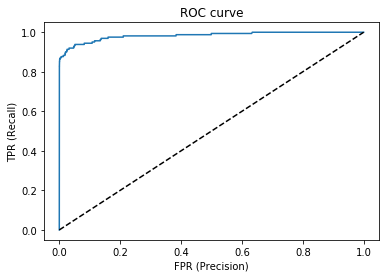

Area under curve (AUC):  0.9828346376396825


In [102]:
from xgboost import XGBClassifier
model2 = XGBClassifier(objective='reg:logistic')
model2.fit(X_train, y_train)

y_pred1 = model2.predict(X_test)
# check the accuracy on the test dataset
print("accuracy on the testing set:",model2.score(X_test, y_test))
print(classification_report(y_pred1, y_test))

#ROC, AUC
from sklearn.metrics import roc_curve, auc
y_score = model2.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

<b>Xgboost increased the performance of f1 score significantly to 85% from 71%(Refer section A-4 - original model) and AUC increased from 96.8% to 98.28%.

<b>5.2 ADABOOST

In [116]:
#preparing original data
X= X_org
y= y_org

#  Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [117]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier()

[[93804    21]
 [   56   106]]
accuracy on the testing set: 0.9991807377616053
Accuracy = 0.9991807377616053
              precision    recall  f1-score   support

           0  0.99940337 0.99977618 0.99958974     93825
           1  0.83464567 0.65432099 0.73356401       162

   micro avg  0.99918074 0.99918074 0.99918074     93987
   macro avg  0.91702452 0.82704858 0.86657688     93987
weighted avg  0.99911938 0.99918074 0.99913120     93987

[0.44843479 0.44348364 0.44381987 ... 0.45341238 0.26069472 0.45121132]


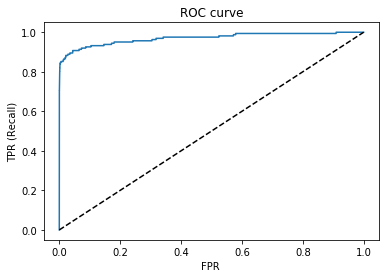

Area under curve (AUC):  0.9698149957400335


In [128]:
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)
print(confusion_matrix( y_test,y_pred_boost))
print("accuracy on the testing set:",boost.score(X_test, y_test))
print('Accuracy =', accuracy_score(y_test, y_pred_boost))
print(classification_report(y_test,y_pred_boost,digits=8))

from sklearn.metrics import roc_curve, auc
y_score = boost.predict_proba(X_test)[:,1]
print(y_score)
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR ')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

<b>Adaboost does not play much role in imporvements of AUC, recall and F1-scores. There are marginal improvements. However,  precision scores have been improved from 60% to 83%.

<b><font color = 'blue'>6. Changing the Threshold

[[93799    34]
 [   26   128]]
Accuracy = 0.9993616138402119
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     93833
        True       0.79      0.83      0.81       154

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.89      0.92      0.90     93987
weighted avg       1.00      1.00      1.00     93987



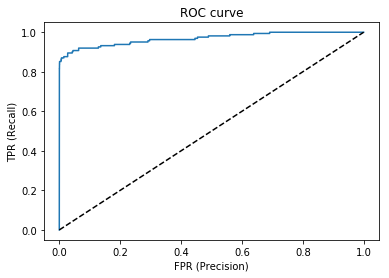

Area under curve (AUC):  0.96833762619534


In [129]:
X= X_org
y= y_org
#  Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# instantiate a logistic regression model, and fit with X_train and y_train
model = LogisticRegression()
model = model.fit(X_train, y_train)

# check the accuracy on the training set
model.score(X_train, y_train)

# Predict class labels for the test set
predicted = (model.predict_proba(X_test)[:,1] >= 0.1).astype(bool)

# Confusion Matrix for train data
print(confusion_matrix(predicted, y_test))
print('Accuracy =', accuracy_score(y_test, predicted))

print(classification_report(predicted, y_test))

#ROC, AUC
from sklearn.metrics import roc_curve, auc
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

<b>After changing the threshold to 10%, our F1-score for identifying fraudulent transactions has improved to 81% from 71%(Refer section A-4 - original model) though AUC remains the same.

<b><font color='blue'>CONCLUSION

Scores summary of all the models are as follows:

<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    <th>AUC</th> 
    <th>Precision</th>
    <th>Recall</th>
    <th>F1-Score</th>
  </tr>
  <tr>
    <td>Original Model</td>
    <td>0.99</td> 
    <td>0.96</td>
      <td>0.6</td>
      <td>0.87</td>
      <td>0.71</td>
  </tr>
    
  <tr>
    <td>Cross Validation</td>
    <td>0.99</td> 
    <td></td>
      <td>0.59</td>
      <td>0.85</td>
      <td>0.69</td>
  </tr>
  
  <tr bgcolor="#32CD32">
    <td>Oversampling (SMOTE)</td>
    <td>0.946</td> 
    <td>0.989</td>
      <td>0.92</td>
      <td>0.97</td>
      <td>0.95</td>
  </tr>
  
   <tr>
    <td>Ensemble (Random Forrest)</td>
    <td>0.99</td> 
    <td>0.928</td>
      <td>0.93</td>
      <td>0.75</td>
      <td>0.83</td>
  </tr>
  
   <tr>
    <td>Bagging (Decision Trees)</td>
    <td>0.99</td> 
    <td>0.97</td>
      <td>0.61</td>
      <td>0.88</td>
      <td>0.72</td>
  </tr>
  
  <tr>
    <td>Boosting (XGBOOST)</td>
    <td>0.99</td> 
    <td>0.98</td>
      <td>0.79</td>
      <td>0.92</td>
      <td>0.85</td>
  </tr>
  
  <tr>
    <td>Boosting (ADABOOST)</td>
    <td>0.99</td> 
    <td>0.969</td>
      <td>0.83</td>
      <td>0.65</td>
      <td>0.73</td>
  </tr>
  
  <tr>
    <td>Threshold change to 10%</td>
    <td>0.99</td> 
    <td>0.968</td>
      <td>0.79</td>
      <td>0.83</td>
      <td>0.81</td>
  </tr>

Out of all the methods we tried, we found that oversampling(SMOTE) method is best suited for our analysis. Significant high F1, Precision and recall scores are observed at a cost of small decline in the accuracy score.<br>

Thus, with use of oversampling(SMOTE) model, banks can better detect fradulent transactions.

--------------------------------------- End of the document ---------------------------------------